# PROJECT: Logs Analysis

## CHAPTER 1: About the logs analysis project

You've been hired onto a team working on a newspaper site. The user-facing newspaper site frontend itself, and the database behind it, are already built and running. You've been asked to build an __internal reporting tool__ that will use information from the database to discover what kind of articles the site's readers like.

The database contains newspaper articles, as well as the web server log for the site. The log has a database row for each time a reader loaded a web page. Using that information, your code will answer questions about the site's user activity.

The program you write in this project will run from the command line. It won't take any input from the user. Instead, it will connect to that database, use SQL queries to analyze the log data, and print out the answers to some questions.

### Why this project?

In this project, you will stretch your SQL database skills. You will get practice interacting with a live database both from the command line and from your code. You will explore a large database with over a million rows. And you will build and refine complex queries and use them to draw business conclusions from data.

#### Report generation

Building an informative summary from logs is a real task that comes up very often in software engineering. For instance, at Udacity we collect logs to help us measure student progress and the success of our courses. The reporting tools we use to analyze those logs involve hundreds of lines of SQL.

#### Database as shared resource

In this project, you'll work with data that could have come from a real-world web application, with fields representing information that a web server would record, such as HTTP status codes and URL paths. The web server and the reporting tool both connect to the same database, allowing information to flow from the web server into the report.

This shows one of the valuable roles of a database server in a real-world application: it's a point where different pieces of software (a web app and a reporting tool, for instance) can share data.

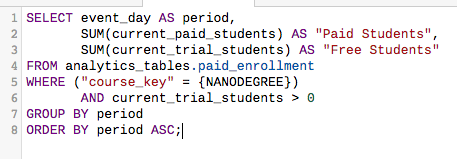
*Just one of many queries Udacity uses for logs analysis.*

## CHAPTER 2: Review your skills

Completing this project will exercise your database skills. Here are some portions of the Relational Databases course that you might want to review:

* Joining tables
* The select ...where statement
* Select clauses
* Writing code with DB-API
* Views

### The PostgreSQL documentation

In this project, you'll be using a PostgreSQL database. If you'd like to know a lot more about the kinds of queries that you can use in this dialect of SQL, check out the PostgreSQL documentation. It's a lot of detail, but it spells out all the many things the database can do.

Here are some parts that may be particularly useful to refer to:

* The select statement
* SQL string functions
* Aggregate functions


## CHAPTER 3: Prepare the software and data

To start on this project, you'll need database software (provided by a Linux virtual machine) and the data to analyze.

### The virtual machine

This project makes use of the same Linux-based virtual machine (VM) as the preceding lessons.

If you skipped those lessons and came right to this project, that's OK! However, you will need to go back to the instructions to install the virtual machine. Please see previous lessons to complete the installation process.

This will give you the PostgreSQL database and support software needed for this project. If you have used an older version of this VM, you may need to install it into a new directory.

If you need to bring the virtual machine back online (with ``vagrant up``), do so now. Then log into it with ``vagrant ssh``.

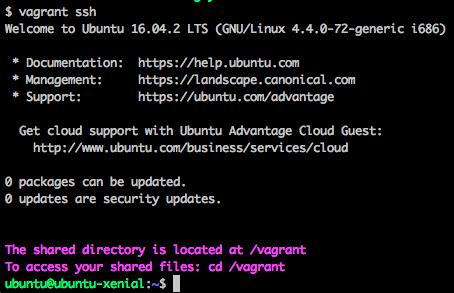
*Successfully logged into the virtual machine.*

### Download the data

Next, [download the data here](https://d17h27t6h515a5.cloudfront.net/topher/2016/August/57b5f748_newsdata/newsdata.zip). You will need to unzip this file after downloading it. The file inside is called ``newsdata.sql``. Put this file into the ``vagrant`` directory, which is shared with your virtual machine.

To build the reporting tool, you'll need to load the site's data into your local database. Review how to use the ``psql`` command in this lesson: (FSND version)

To load the data, ``cd`` into the ``vagrant`` directory and use the command ``psql -d news -f newsdata.sql``.
Here's what this command does:

* ``psql`` — the PostgreSQL command line program
* ``-d news`` — connect to the database named news which has been set up for you
* ``-f newsdata.sql`` — run the SQL statements in the file newsdata.sql

Running this command will connect to your installed database server and execute the SQL commands in the downloaded file, creating tables and populating them with data.

### Getting an error?

If this command gives an error message, such as —
```python
psql: FATAL: database "news" does not exist
psql: could not connect to server: Connection refused
```
— this means the database server is not running or is not set up correctly. This can happen if you have an older version of the VM configuration from before this project was added. To continue, download the virtual machine configuration into a fresh new directory and start it from there.

### Explore the data

Once you have the data loaded into your database, connect to your database using ``psql -d news`` and explore the tables using the ``\dt`` and ``\d table`` commands and ``select`` statements.

* ``\dt`` — display tables — lists the tables that are available in the database.
* ``\d table`` — (replace table with the name of a table) — shows the database schema for that particular table.

Get a sense for what sort of information is in each column of these tables.

The database includes three tables:

* The ``authors`` table includes information about the authors of articles.
* The ``articles`` table includes the articles themselves.
* The ``log`` table includes one entry for each time a user has accessed the site.

As you explore the data, you may find it useful to take notes! Don't try to memorize all the columns. Instead, write down a description of the column names and what kind of values are found in those columns.

### Connecting from your code

The database that you're working with in this project is running PostgreSQL, like the forum database that you worked with in the course. So in your code, you'll want to use the psycopg2 Python module to connect to it, for instance:
```python
db = psycopg2.connect("dbname=news")
```

## CHAPTER 4: Your assignment: Build it!

Your task is to create a reporting tool that prints out reports (in plain text) based on the data in the database. This reporting tool is a Python program using the psycopg2 module to connect to the database.

### So what are we reporting, anyway?

Here are the questions the reporting tool should answer. The example answers given aren't the right ones, though!

__1. What are the most popular three articles of all time?__ Which articles have been accessed the most? Present this information as a sorted list with the most popular article at the top.

#### Example:

* "Princess Shellfish Marries Prince Handsome" — 1201 views
* "Baltimore Ravens Defeat Rhode Island Shoggoths" — 915 views
* "Political Scandal Ends In Political Scandal" — 553 views

__2. Who are the most popular article authors of all time?__ That is, when you sum up all of the articles each author has written, which authors get the most page views? Present this as a sorted list with the most popular author at the top.

#### Example:

* Ursula La Multa — 2304 views
* Rudolf von Treppenwitz — 1985 views
* Markoff Chaney — 1723 views
* Anonymous Contributor — 1023 views

__3. On which days did more than 1% of requests lead to errors?__ The log table includes a column status that indicates the HTTP status code that the news site sent to the user's browser. (Refer to this lesson for more information about the idea of HTTP status codes.)

#### Example:

* July 29, 2016 — 2.5% errors

### Good coding practices
#### SQL style

Each one of these questions can be answered with a single database query. Your code should get the database to do the heavy lifting by using joins, aggregations, and the ``where`` clause to extract just the information you need, doing minimal "post-processing" in the Python code itself.

In building this tool, you may find it useful to add views to the database. You are allowed and encouraged to do this! However, if you create views, make sure to put the __create view__ commands you used into your lab's README file so your reviewer will know how to recreate them.


#### Python code quality

Your code should be written with good Python style. The [PEP8 style guide](https://www.python.org/dev/peps/pep-0008/) is an excellent standard to follow. You can do a quick check using the ``pep8`` command-line tool.


## CHAPTER 5: FAQ

### Q: I modified my database. Can I undo it?

If you'd like to revert the ``news`` database to its original form, you can do that by dropping each of the tables, then re-importing the data from the ``newsdata.sql`` file.

In ``psql``:
```python
drop table log;
drop table articles;
drop table authors;
```
Then in the shell, re-import the data:
```python
psql -d news -f newsdata.sql
```

### Q: These queries are complicated. Where do I start?

One of the best ways to build complex queries is by starting with smaller pieces, and testing each of them in small steps. Here's a worked example —

Suppose we wanted to print out each article's title and author name.

Looking at the schema for ``articles`` (with ``\d articles``) we can see there's an author and title column. But the author column doesn't have names in it — just numbers. To see this in your database, run:
```python
select author from articles;
```
But the ``authors`` table has a ``name`` column, and a numeric ``id`` column. To see this, run:
```python
select * from authors;
```
Those numeric id values match up with the ``articles.author`` column. And that means we can connect the two tables with a join:
```python
select title, name
from articles join authors
on articles.author = authors.id;
```
or:
```python
select title, name
from articles, authors
where articles.author = authors.id;
```
Try these queries on your ``news`` database! Look for other relationships that can work with ``join``.


## CHAPTER 6: Project: Logs Analysis


### Project Submission

Once you've completed the project, submit it for review.

### Take a look at the project rubric here
#### Project Specification 'Logs Analysis'

*__Functionality__*

Criteria |	Meets Specifications
--|--
Functionality | Running the code displays the correct answers to each of the questions in the project description.
Compatibility: Database | The code works with the (unchanged) database schema from the project description. It is OK to add views to the database, but don't modify or rename the existing tables.
Compatibility: Language | The code may be written in Python 2 or Python 3 but must be consistent. It should start with a correct shebang line to indicate the Python version.
Well-formatted text output | The code presents its output in clearly formatted plain text. Imagine that you are looking at this text in an email message, not on a web page.
Database queries | The code connects to and queries an SQL database. It does not use answers hardcoded into the application code.

*__Code quality__*

Criteria |	Meets Specifications
--|--
No errors | The project code runs without any error messages or warnings from the language interpreter.
Application code style | The code conforms to the PEP8 style recommendations. You can install the pycodestyle tool to test this, with pip install pycodestyle or pip3 install pycodestyle (Python 3). In order for this requirement to pass, running the pycodestyle tool on your code should produce zero warnings. (pycodestyle was formerly known as pep8. These are the same thing.)
SQL code quality | When the application fetches data from multiple tables, it uses a single query with a join, rather than multiple queries. Each of the questions must be answered using one SQL query.

*__README file__*

Criteria |	Meets Specifications
--|--
README file describes work | The README file includes instructions for how to run the program, as well as a description of the program's design. Imagine a person who knows Python and SQL well, but has not done this project. If that person read the README would they know how to run this code?
README file includes view definitions, if any |	If the code relies on views created in the database, the README file includes the create view statements for these views.(If the code does not depend on views, ignore this requirement.).

These are the code standards that your reviewer will be using to evaluate your code.

Your submission should include:

* Your program's source code. Usually this will be one source code file.
* An example of your program's output. This will be a plain text file that is a copy of what your program printed out.
* A README.md file This is a Markdown text file in which you describe the design of your code and how to run it. If you created any views in the database, make sure to put the create view commands into the README file. For more information on writing good READMEs, see [this course](https://classroom.udacity.com/courses/ud777).

You do not need to include the database, the newsdata.sql file, or any other files besides these.
 Congratulations! You've completed this project
 
# YOU CAN FIND THE SOLUTION [HERE](https://github.com/airdenis/log_analysis)